In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('default')


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [24]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [103]:
iran_series = df[df['Country']=='Iran'].groupby('Year')['PM2.5'].sum()
china_series = df[df['Country']=='China'].groupby('Year')['PM2.5'].sum()

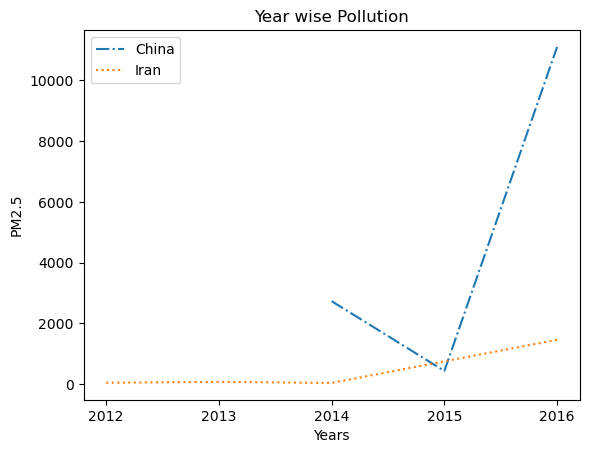

In [104]:
plt.plot(china_series.index,china_series.values,label='China',linestyle='-.')
plt.plot(iran_series.index,iran_series.values,label='Iran',linestyle=':')
plt.xticks((iran_series + china_series).index)
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.title('Year wise Pollution')
plt.legend()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

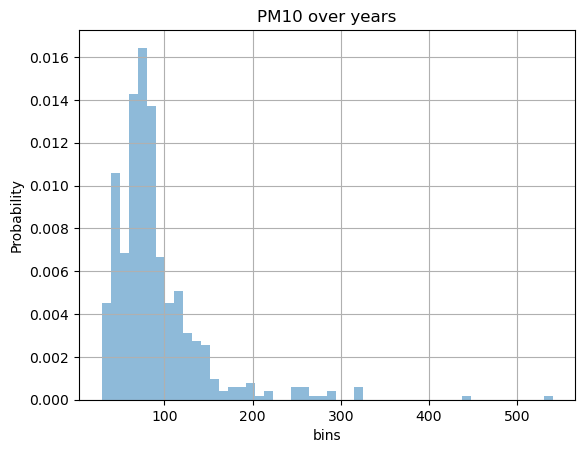

In [120]:
# code here
plt.hist(df['PM10'],density=True,bins=50,alpha=0.5)
plt.xlabel('bins')
plt.ylabel('Probability')
plt.title('PM10 over years')
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

Text(0.5, 1.0, 'PM10 vs PM2.5')

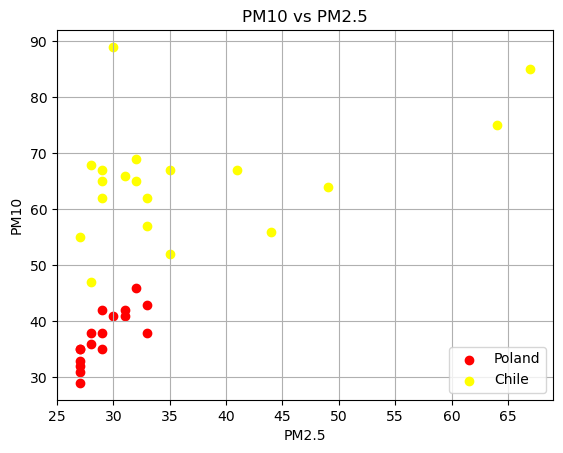

In [133]:
# code here
poland = df[df['Country']=='Poland']
chile = df[df['Country']=='Chile']
plt.scatter(poland['PM2.5'],poland['PM10'],color='red',label='Poland')
plt.scatter(chile['PM2.5'],chile['PM10'],color='yellow',label='Chile')
plt.legend()
plt.grid()
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM10 vs PM2.5')

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

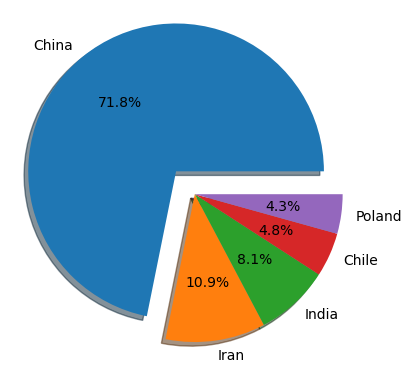

In [147]:
# code here
freq_countries = df['Country'].value_counts().head().copy()
plt.pie(freq_countries,labels=freq_countries.index,autopct='%0.1f%%',shadow=True,explode=[0.2,0,0,0,0])
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



Text(0.5, 1.0, 'Countries Frequency')

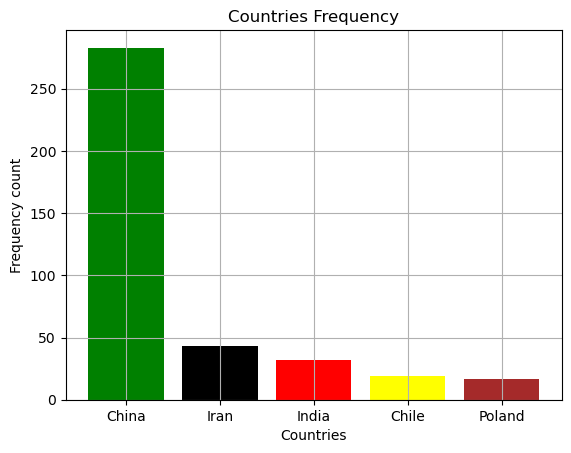

In [156]:
# code here
freq_countries
plt.bar(freq_countries.index, freq_countries,color=['green','black','red','yellow','brown'])
plt.grid()
plt.xlabel('Countries')
plt.ylabel('Frequency count')
plt.title('Countries Frequency')

##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [232]:
# code here
df = pd.read_csv('company_sales_data.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


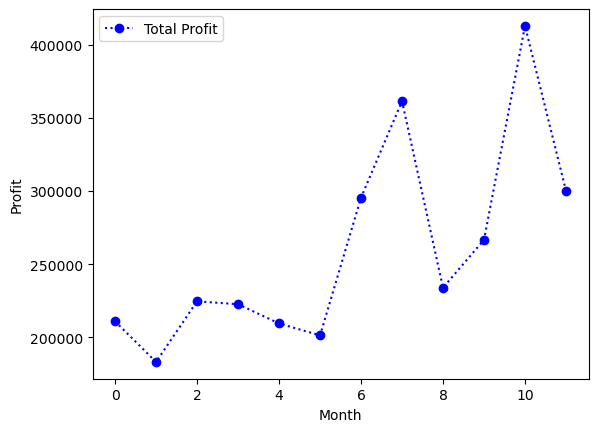

In [173]:
plt.plot(df['total_profit'],linestyle='dotted',color='blue',label='Total Profit',marker='o')
plt.legend(loc= 'upper left')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

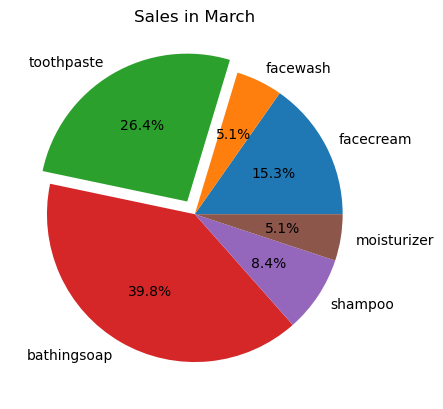

In [197]:
# code here
march_sales = df.iloc[3,1:-2]
plt.pie(march_sales,labels=march_sales.index,autopct='%0.1f%%',explode=[0,0,0.1,0,0,0])
plt.title('Sales in March')
plt.show()

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

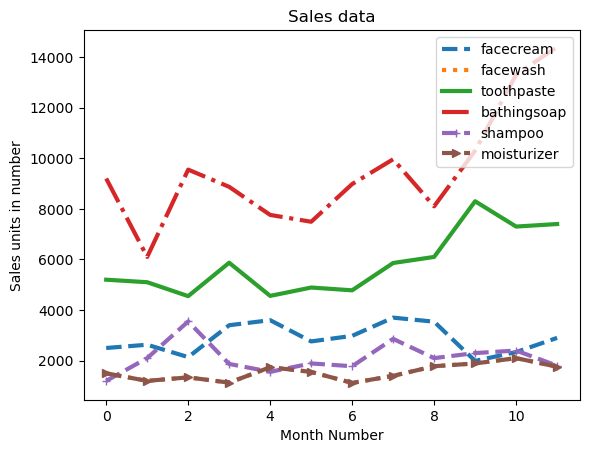

In [228]:
# code here
plt.plot(df['facecream'],linestyle='--',label='facecream',linewidth=3)
plt.plot(df['facewash'],linestyle=':',label='facewash',linewidth=3)
plt.plot(df['toothpaste'],linestyle='-',label='toothpaste',linewidth=3)
plt.plot(df['bathingsoap'],linestyle='-.',label='bathingsoap',linewidth=3)
plt.plot(df['shampoo'],linestyle='--',marker='+',label='shampoo',linewidth=3)
plt.plot(df['moisturizer'],linestyle='--',marker='>',label='moisturizer',linewidth=3)
plt.legend(loc='upper right')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.title('Sales data')
plt.show()

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [325]:
# code here
import datetime as dt
df['month_name'] = df['month_number'].apply(lambda x: dt.date(1900, x, 1))
df['date'] = pd.to_datetime(df['month_name'])
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,month_name,date
0,1,2500,1500,5200,9200,1200,1500,21100,211000,1900-01-01,1900-01-01
1,2,2630,1200,5100,6100,2100,1200,18330,183300,1900-02-01,1900-02-01
2,3,2140,1340,4550,9550,3550,1340,22470,224700,1900-03-01,1900-03-01
3,4,3400,1130,5870,8870,1870,1130,22270,222700,1900-04-01,1900-04-01
4,5,3600,1740,4560,7760,1560,1740,20960,209600,1900-05-01,1900-05-01
5,6,2760,1555,4890,7490,1890,1555,20140,201400,1900-06-01,1900-06-01
6,7,2980,1120,4780,8980,1780,1120,29550,295500,1900-07-01,1900-07-01
7,8,3700,1400,5860,9960,2860,1400,36140,361400,1900-08-01,1900-08-01
8,9,3540,1780,6100,8100,2100,1780,23400,234000,1900-09-01,1900-09-01
9,10,1990,1890,8300,10300,2300,1890,26670,266700,1900-10-01,1900-10-01


In [377]:
temp_df = df.pivot_table(index=df['date'].dt.quarter,aggfunc='sum',values=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer'])
temp_df

,bathingsoap,facecream,facewash,moisturizer,shampoo,toothpaste
date,,,,,,
1,24850,7270,4040,4040,6850,14850
2,24120,9760,4425,4425,5320,15320
3,27040,10220,4300,4300,6740,16740
4,38000,7230,5750,5750,6500,23000


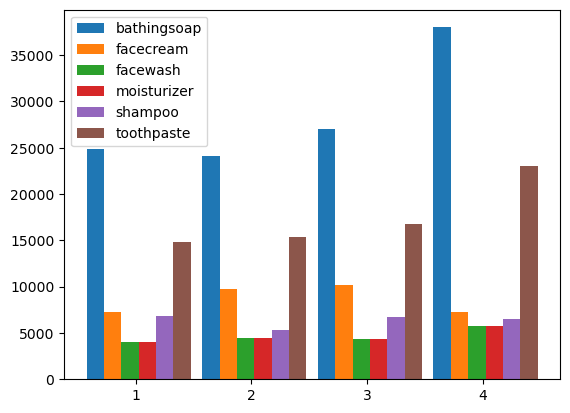

In [401]:
i = 1
width = 0.15
for col in temp_df.columns:
    plt.bar(np.arange(temp_df.shape[0]) + width * i, temp_df[col], width=width, label=col)
    i = i + 1
plt.xticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.legend()
plt.show()

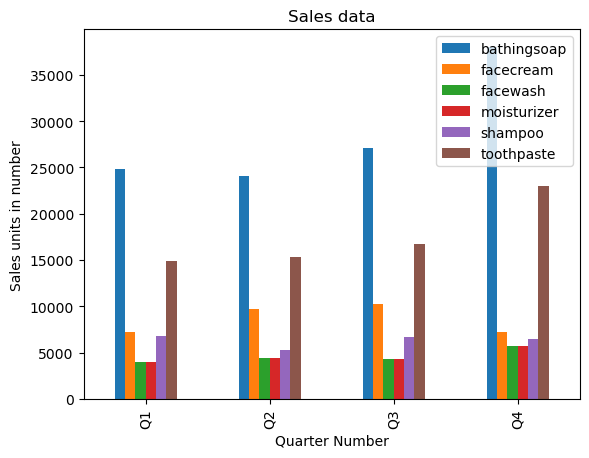

In [331]:
temp_df.plot(kind='bar')
plt.legend(loc='upper right')
plt.xlabel('Quarter Number')
plt.ylabel('Sales units in number')
plt.xticks([0,1,2,3],['Q1','Q2','Q3','Q4'])
plt.title('Sales data')
plt.show()

###`Problem-10` Plot Stacked Bar chart quarter wise for each product.

In [407]:
# code here
temp_df = temp_df.swapaxes(axis1=1,axis2=0)
temp_df

date,1,2,3,4
bathingsoap,24850,24120,27040,38000
facecream,7270,9760,10220,7230
facewash,4040,4425,4300,5750
moisturizer,4040,4425,4300,5750
shampoo,6850,5320,6740,6500
toothpaste,14850,15320,16740,23000


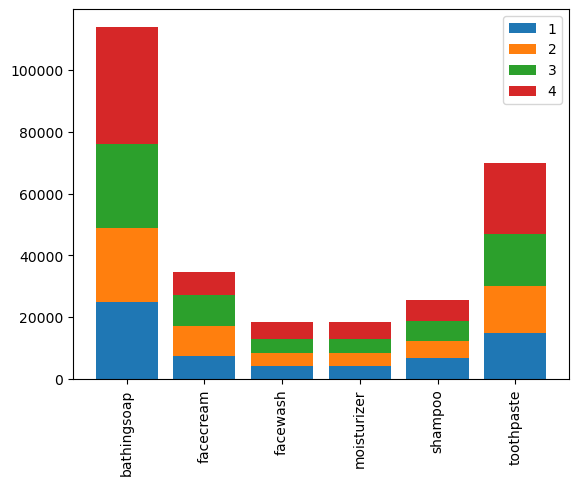

In [410]:
all_cols = []
for col in temp_df:
    if len(all_cols) == 0:
        plt.bar(temp_df.index,temp_df[col],label=col)
    else:
        plt.bar(temp_df.index,temp_df[col],label=col,bottom=sum(all_cols))
    all_cols.append(temp_df[col])
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

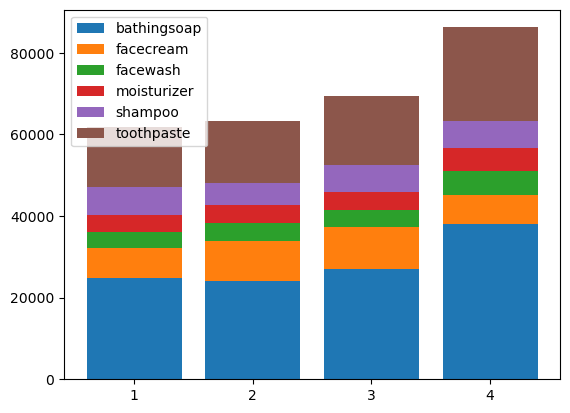

In [375]:
all_cols=[]
for col in temp_df.columns:
    if len(all_cols)==0:
        plt.bar(temp_df.index,temp_df[col],label=col)
    else:
        plt.bar(temp_df.index,temp_df[col],label=col,bottom=sum(all_cols))
    all_cols.append(temp_df[col])

plt.xticks(temp_df.index)
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

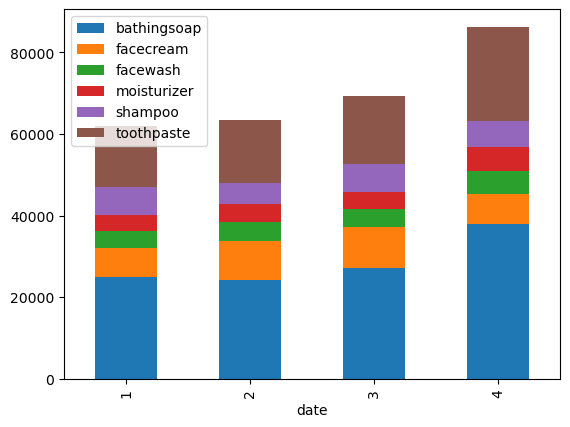

In [376]:
temp_df.plot.bar(stacked=True)